<a href="https://colab.research.google.com/github/Akshitha181203/CNN/blob/main/2021csb1122_Lab_8%2C9%2C10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
# Set the directory paths
dataset_path = "/content/drive/MyDrive/Dataset_Lab/Dataset"
test_path = "/content/drive/MyDrive/Dataset_Lab/test"

# Define image size and batch size
img_size = (128, 128)
batch_size = 32

In [ ]:
# Load the training and validation datasets with a 70-30 split
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.3,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.3,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

Found 240 files belonging to 2 classes.
Using 168 files for training.
Found 240 files belonging to 2 classes.
Using 72 files for validation.


In [ ]:
# Load the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=img_size,
    batch_size=batch_size
)

Found 20 files belonging to 2 classes.


In [ ]:
# Normalize pixel values to [0, 1]
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
# Enable data prefetching to reduce loading time
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# Define a simplified CNN model architecture
model = models.Sequential([
    # 1st convolution layer
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    layers.MaxPooling2D((2, 2)),
    # 2nd convolution layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # 3rd convolution layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # 4rd convolution layer
    # layers.Conv2D(128, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # flattens the surface
    layers.Flatten(),
    # Dense layer
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),                # Dropout for reducing the overfitting
    # output layer for binary classification
    layers.Dense(2, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 25
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.4876 - loss: 0.7414 - val_accuracy: 0.4722 - val_loss: 0.6944
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.5509 - loss: 0.6837 - val_accuracy: 0.7222 - val_loss: 0.6727
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.6728 - loss: 0.6539 - val_accuracy: 0.6806 - val_loss: 0.6257
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.7260 - loss: 0.5981 - val_accuracy: 0.7222 - val_loss: 0.5542
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.7790 - loss: 0.4758 - val_accuracy: 0.6389 - val_loss: 0.6370
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.7649 - loss: 0.4831 - val_accuracy: 0.7083 - val_loss: 0.5242
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.7918 - loss: 0.4353 - val_accuracy: 0.7083 - val_loss: 0.5491
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.7429 - loss: 0.4826 - val_accuracy: 0.7500 - val_loss: 0.5146
Epoch 9/

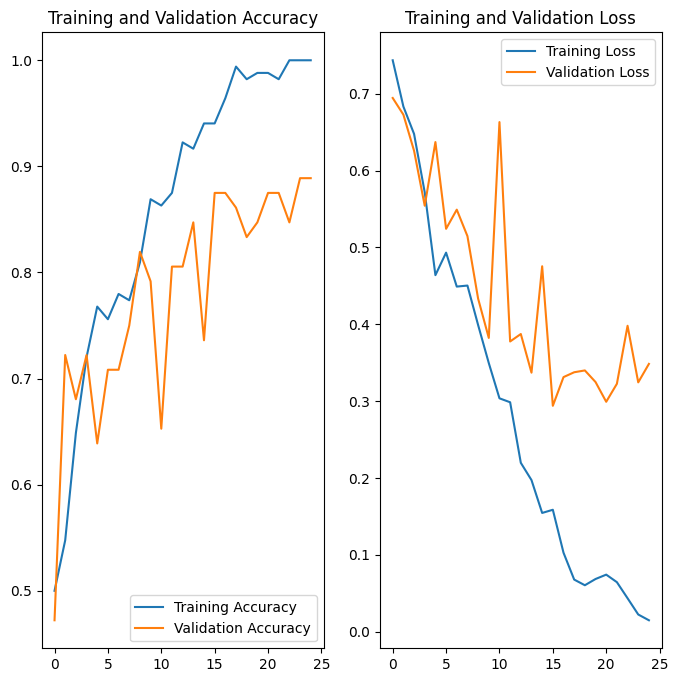

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step - accuracy: 0.8000 - loss: 0.9442
Test Accuracy: 80.00%


In [ ]:
# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
